In [2]:
data = pd.read_csv('memotion_dataset_7k/labels.csv')
data.head()

,Unnamed: 0,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,positive
1,1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,positive
2,2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive
3,3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive
4,4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral


In [3]:
meme_text = pd.DataFrame()
meme_text['text'] = data.text_corrected
meme_text['sentiment'] = data.overall_sentiment
meme_text.head()

,text,sentiment
0,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,positive
1,The best of #10 YearChallenge! Completed in le...,positive
2,Sam Thorne @Strippin ( Follow Follow Saw every...,positive
3,10 Year Challenge - Sweet Dee Edition,positive
4,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral


In [4]:
cleaned = meme_text.copy()
cleaned.dropna(inplace=True)
cleaned.isnull().any()

text         False
sentiment    False
dtype: bool

In [5]:
target = cleaned['sentiment']
target = pd.get_dummies(target)
labels = []
for _, i in target.iterrows():
    labels.append(np.argmax(i))
labels[0:5]

[2, 2, 2, 2, 1]

In [6]:
import nlpaug
import nlpaug.augmenter.word as naw
def Augmentation(text, labels):
    aug = naw.SynonymAug(aug_src='wordnet',aug_max=3)
    augmented_sentences = []
    augmented_sentences_labels = []
    for i in range(0, len(text)):
        if np.argmax(labels.iloc[i]) == 0:
            t = 'negative'
            temps = aug.augment(text.iloc[i],n=6)
        elif np.argmax(labels.iloc[i]) == 1:
            t = 'neutral'
            temps = aug.augment(text.iloc[i],n=2)
        else:
            augmented_sentences.append(text.iloc[i])
            augmented_sentences_labels.append('positive')
            continue
        for sent in temps:
            augmented_sentences.append(sent)
            augmented_sentences_labels.append(t)
        
    return augmented_sentences,augmented_sentences_labels

In [7]:
text, sent = Augmentation(cleaned.text, target)
cleaned = pd.DataFrame()
cleaned['text'] = text
cleaned['sentiment'] = sent

In [8]:
len(cleaned.text)

12342

In [9]:
from tensorflow.keras.utils import to_categorical
#sent = to_categorical(sent)
sentt = pd.get_dummies(sent)
pd.DataFrame(text).shape, pd.DataFrame(sentt).shape

((12342, 1), (12342, 3))

C:\Users\hp\anaconda3\envs\Rohit\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

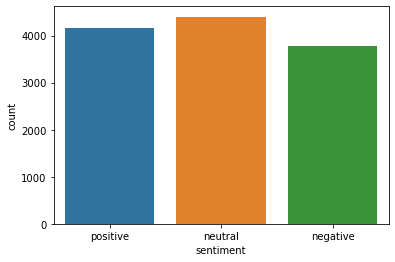

In [10]:
sns.countplot(cleaned.sentiment)

In [11]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", 
             "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during",
             "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", 
             "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into",
             "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or",
             "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", 
             "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's",
             "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up",
             "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's",
             "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've",
             "your", "yours", "yourself", "yourselves" ]

In [12]:
def remove_stopwords(data):
    data['text'] = data['text'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stopwords)]))
    return data

def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
 
data_without_stopwords = []
data_without_stopwords = remove_stopwords(cleaned)
data_without_stopwords['text']= data_without_stopwords['text'].apply(lambda cw : remove_tags(cw))
data_without_stopwords['text'] = data_without_stopwords['text'].str.replace('[{}]'.format(string.punctuation), ' ')

C:\Users\hp\AppData\Local\Temp/ipykernel_21968/1822268650.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  data_without_stopwords['text'] = data_without_stopwords['text'].str.replace('[{}]'.format(string.punctuation), ' ')


In [13]:
text = data_without_stopwords.text
sentiment = data_without_stopwords['sentiment']

In [14]:
y = sentt
pd.DataFrame(y).head()

,negative,neutral,positive
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0


In [15]:
X_train, X_test,Y_train, Y_test = train_test_split(text, y, test_size=0.3, random_state = 45)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size = 0.4)
X_train.shape, X_test.shape, X_val.shape

((8639,), (2221,), (1482,))

In [16]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

words_to_index = tokenizer.word_index

In [17]:
def read_fasttext_vector(fasttext_vec):
    with open(fasttext_vec, 'r', encoding='UTF-8') as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            w_line = line.split()
            curr_word = w_line[0]
            word_to_vec_map[curr_word] = np.array(w_line[1:], dtype=np.float64)
    return word_to_vec_map

In [18]:
word_to_vec_map = read_fasttext_vector('crawl-300d-2M.vec')

maxLen = 150

In [20]:
vocab_len = len(words_to_index)
embed_vector_len = word_to_vec_map['moon'].shape[0]

emb_matrix = np.zeros((vocab_len, embed_vector_len))

for word, index in words_to_index.items():
    embedding_vector = word_to_vec_map.get(word)
    if embedding_vector is not None:
        emb_matrix[index-1, :] = embedding_vector

embedding_layer = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [emb_matrix], trainable=False)

In [21]:
def Sent_Analysis(input_shape):

    X_indices = Input(input_shape)

    embeddings = embedding_layer(X_indices)

    X = Bidirectional(LSTM(128, return_sequences=True))(embeddings)

    X = Dropout(0.6)(X)

    X = Bidirectional(LSTM(128, return_sequences=True))(X)
    X = Dropout(0.6)(X)
    
    X = Bidirectional(LSTM(256, return_sequences=True))(X)
    X = Dropout(0.6)(X)
    
    X = Conv1D(256,3,activation='relu')(X)
    X = Dropout(0.6)(X)
    
    X = Conv1D(256,3,activation='relu')(X)
    X = Dropout(0.6)(X)

    X = Bidirectional(LSTM(128))(X)

    X = Dense(3, activation='softmax')(X)

    model = Model(inputs=X_indices, outputs=X)

    return model

In [22]:
def conv1d_model(input_shape):

    X_indices = Input(input_shape)

    embeddings = embedding_layer(X_indices)

    X = Conv1D(128,3,activation='relu')(embeddings)
    X = Dropout(0.8)(X)
    
#     X = Conv1D(128,3,activation='relu')(embeddings)
#     X = Dropout(0.8)(X)

#     X = MaxPooling1D(2)(X)

#     X = Conv1D(256,3,activation='relu')(X)
#     X = Dropout(0.8)(X)
#     X = MaxPooling1D(2)(X)

    X = Conv1D(128,3,activation='relu')(X)
    X = Dropout(0.8)(X)
    #X = MaxPooling1D(2)(X)

    X = GlobalMaxPooling1D()(X)

    X = Dense(128, activation='relu')(X)
    X = Dense(3, activation='softmax')(X)

    model = Model(inputs=X_indices, outputs=X)

    return model

In [23]:
model = Sent_Analysis((maxLen,))
model.summary()

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.embedding_lookup), but
are not present in its tracked objects:
  <tf.Variable 'embedding/embeddings:0' shape=(13123, 300) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150)]             0         
_________________________________________________________________
tf.cast (TFOpLambda)         (None, 150)               0         
_________________________________________________________________
tf.compat.v1.nn.embedding_lo (None, 150, 300)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 150, 256)     

In [24]:
model_1d = conv1d_model((maxLen,))
model_1d.summary()

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.embedding_lookup_1), but
are not present in its tracked objects:
  <tf.Variable 'embedding/embeddings:0' shape=(13123, 300) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150)]             0         
_________________________________________________________________
tf.cast_1 (TFOpLambda)       (None, 150)               0         
_________________________________________________________________
tf.compat.v1.nn.embedding_lo (None, 150, 300)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 148, 128) 

In [25]:
X_train_indices = tokenizer.texts_to_sequences(X_train)
X_val_indices = tokenizer.texts_to_sequences(X_val)

In [26]:
X_train_indices = pad_sequences(X_train_indices, maxlen=maxLen, padding='post')
X_val_indices = pad_sequences(X_val_indices, maxlen=maxLen, padding='post')
X_train_indices.shape, X_val_indices.shape

((8639, 150), (1482, 150))

In [27]:
#adam = keras.optimizers.Adam(learning_rate = 0.0001)
model_1d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
his1 = model_1d.fit(X_train_indices, Y_train, validation_data = (X_val_indices, Y_val), batch_size=64, epochs=30)

Epoch 1/30
135/135 [==============================] - 16s 27ms/step - loss: 1.1791 - accuracy: 0.3551 - val_loss: 1.0949 - val_accuracy: 0.3549
Epoch 2/30
135/135 [==============================] - 4s 26ms/step - loss: 1.0984 - accuracy: 0.3730 - val_loss: 1.0925 - val_accuracy: 0.4170
Epoch 3/30
135/135 [==============================] - 3s 24ms/step - loss: 1.0825 - accuracy: 0.3896 - val_loss: 1.0878 - val_accuracy: 0.4096
Epoch 4/30
135/135 [==============================] - 4s 26ms/step - loss: 1.0699 - accuracy: 0.4055 - val_loss: 1.0839 - val_accuracy: 0.3731
Epoch 5/30
135/135 [==============================] - 4s 27ms/step - loss: 1.0420 - accuracy: 0.4330 - val_loss: 1.0764 - val_accuracy: 0.3812
Epoch 6/30
135/135 [==============================] - 4s 28ms/step - loss: 1.0169 - accuracy: 0.4518 - val_loss: 1.0699 - val_accuracy: 0.4109
Epoch 7/30
135/135 [==============================] - 4s 27ms/step - loss: 0.9805 - accuracy: 0.4795 - val_loss: 1.0683 - val_accuracy: 0.373

Text(0, 0.5, 'Accuracy')

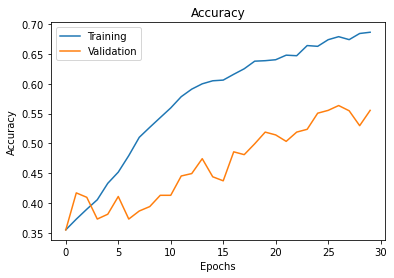

In [29]:
taccr = his1.history['accuracy']
vaccr = his1.history['val_accuracy']
tloss = his1.history['loss']
vloss = his1.history['val_loss']
plt.plot(taccr)
plt.plot(vaccr)
plt.title("Accuracy")
plt.legend(["Training", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'loss')

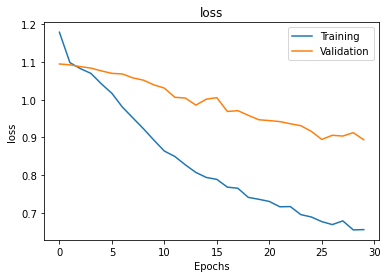

In [30]:
taccr = his1.history['loss']
vaccr = his1.history['val_loss']
tloss = his1.history['loss']
vloss = his1.history['val_loss']
plt.plot(taccr)
plt.plot(vaccr)
plt.title("loss")
plt.legend(["Training", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("loss")

In [31]:
#adam = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
his2 = model.fit(X_train_indices, Y_train,validation_data = (X_val_indices, Y_val), batch_size=64, epochs=15)

Epoch 1/15
135/135 [==============================] - 57s 314ms/step - loss: 1.0921 - accuracy: 0.3793 - val_loss: 1.0948 - val_accuracy: 0.3677
Epoch 2/15
135/135 [==============================] - 29s 217ms/step - loss: 1.0568 - accuracy: 0.4263 - val_loss: 1.0492 - val_accuracy: 0.4379
Epoch 3/15
135/135 [==============================] - 30s 222ms/step - loss: 1.0060 - accuracy: 0.4784 - val_loss: 1.0193 - val_accuracy: 0.4561
Epoch 4/15
135/135 [==============================] - 30s 220ms/step - loss: 0.9422 - accuracy: 0.5231 - val_loss: 1.0251 - val_accuracy: 0.4912
Epoch 5/15
135/135 [==============================] - 29s 218ms/step - loss: 0.8606 - accuracy: 0.5710 - val_loss: 1.0038 - val_accuracy: 0.4838
Epoch 6/15
135/135 [==============================] - 30s 221ms/step - loss: 0.7846 - accuracy: 0.6164 - val_loss: 0.9396 - val_accuracy: 0.5675
Epoch 7/15
135/135 [==============================] - 30s 224ms/step - loss: 0.7206 - accuracy: 0.6459 - val_loss: 0.9033 - val_ac

Text(0, 0.5, 'Accuracy')

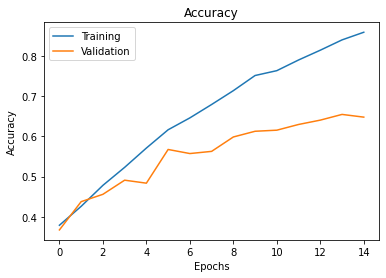

In [33]:
taccr = his2.history['accuracy']
vaccr = his2.history['val_accuracy']
tloss = his2.history['loss']
vloss = his2.history['val_loss']
plt.plot(taccr)
plt.plot(vaccr)
plt.title("Accuracy")
plt.legend(["Training", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'loss')

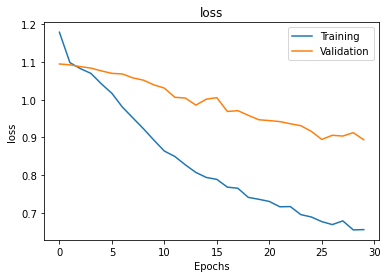

In [34]:
taccr = his1.history['loss']
vaccr = his1.history['val_loss']
tloss = his1.history['loss']
vloss = his1.history['val_loss']
plt.plot(taccr)
plt.plot(vaccr)
plt.title("loss")
plt.legend(["Training", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("loss")

In [35]:
X_test_indices = tokenizer.texts_to_sequences(X_test)

X_test_indices = pad_sequences(X_test_indices, maxlen=maxLen, padding='post')

In [36]:
y_pred1 = model.predict(X_test_indices)
y_pred2 = model_1d.predict(X_test_indices)

In [37]:
yt = np.argmax(np.array(Y_test), axis = 1)
yp1 = np.argmax(y_pred1, axis = 1)
yp2 = np.argmax(y_pred2, axis = 1)

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(yt, yp1), accuracy_score(yt, yp2)

(0.6659162539396668, 0.5605583070688879)

In [39]:
print(classification_report(yt,yp1), classification_report(yt,yp2))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       701
           1       0.60      0.63      0.62       804
           2       0.58      0.49      0.53       716

    accuracy                           0.67      2221
   macro avg       0.66      0.67      0.66      2221
weighted avg       0.66      0.67      0.66      2221
               precision    recall  f1-score   support

           0       0.96      0.60      0.74       701
           1       0.64      0.19      0.29       804
           2       0.44      0.95      0.60       716

    accuracy                           0.56      2221
   macro avg       0.68      0.58      0.54      2221
weighted avg       0.67      0.56      0.53      2221



Text(33.0, 0.5, 'Truth')

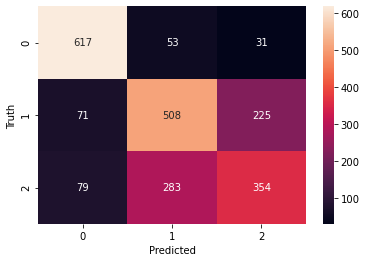

In [41]:
cm = confusion_matrix(yt, yp1)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(33.0, 0.5, 'Truth')

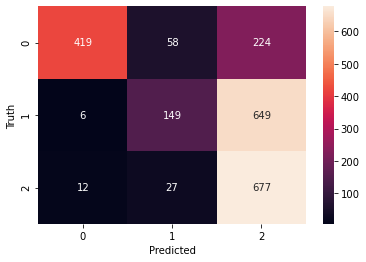

In [43]:
cm = confusion_matrix(yt, yp2)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
yp1

array([0, 1, 2, ..., 0, 1, 1], dtype=int64)

In [45]:
Y_test

,negative,neutral,positive
8004,1,0,0
6126,0,0,1
3557,0,1,0
6938,1,0,0
4618,0,1,0
...,...,...,...
2016,1,0,0
12126,1,0,0
9995,1,0,0
9987,0,0,1


In [46]:
X_test.iloc[1]

'WHEN YOU RE PLAYING ANTAKSHARI SCOOPWHOOP COM AND SING A SONG STARTING WITH  Z '

In [47]:
X_test.iloc[0]

'BTS Convey picture best friend And somebody wants join Made allkpop  com   meme'

In [48]:
X_test.iloc[2]

'FRIGGERED Devising memes weed 4   20 Making memes Hitler   s birthday quartet   20'

In [104]:
X_test.iloc[108]

'I CANNOT BRAIN TODAY I HAS THE DUMB'

In [102]:
Y_test[100:110], yp1[100:110]

(       negative  neutral  positive
 5967          1        0         0
 5487          0        0         1
 10397         0        0         1
 6764          1        0         0
 4448          1        0         0
 9616          0        0         1
 12105         1        0         0
 4208          0        1         0
 885           0        1         0
 10970         0        1         0,
 array([0, 2, 2, 0, 0, 0, 0, 2, 1, 1], dtype=int64))

In [63]:
Y_test.iloc[6]

negative    0
neutral     0
positive    1
Name: 11987, dtype: uint8